In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0728 10:21:10.518266   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 10:21:10.536206   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 10:21:10.539170   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0728 10:21:31.927251   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 10:21:31.945203   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W0728 10:21:31.951189   864 deprecation.py:323] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0728 10:22:21.123403   864 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.4855 - acc: 0.7804 - val_loss: 0.3702 - val_acc: 0.8569
Epoch 2/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2808 - acc: 0.9071 - val_loss: 0.2925 - val_acc: 0.8865
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2070 - acc: 0.9295 - val_loss: 0.2741 - val_acc: 0.8907
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1671 - acc: 0.9449 - val_loss: 0.2775 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1348 - acc: 0.9568 - val_loss: 0.2946 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1113 - acc: 0.9654 - val_loss: 0.2999 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0899 - acc: 0.9753 - val_loss: 0.3202 - 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
import matplotlib.pyplot as plt

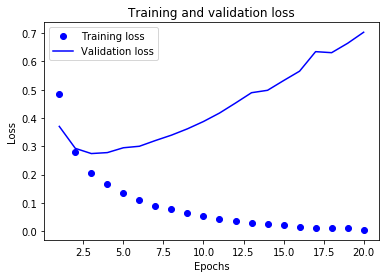

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

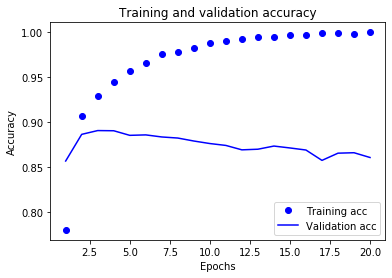

<Figure size 432x288 with 0 Axes>

In [23]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=100)

In [26]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.4245 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.2415 - acc: 0.9116
Epoch 3/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1867 - acc: 0.9318: 0s - loss: 0.1854 - a
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [24]:
results

[0.30564037347793577, 0.87844]

In [25]:
model.predict(x_test)

array([[0.1706343 ],
       [0.99963284],
       [0.78241247],
       ...,
       [0.08697084],
       [0.05877921],
       [0.39225352]], dtype=float32)

In [1]:
#1.
#이 데이터셋은 영화 리뷰에 대한 데이터셋이다.
#각각의 데이터는 긍정적이거나 부정적이고, 리뷰를 단어별로 쪼개서 딕셔너리에 맞는 
#인덱스로 바꿔서 저장되어 있다.
#2.
#이 모델의 출력값은 리뷰가 부정적이면 0, 긍정적이면 1이다.
#이를 예측하는 방법은 리뷰의 단어들을 10000개의 단어가 든 딕셔너리에 대입해서
#train_set의 label을 통해 딕셔너리의 각각의 인덱스의 긍정, 부정에 대한 가중치를
#학습한다. 이를 통해 test_set이 들어왔을 때, 긍정적인 단어의 개수와 부정적인 단어의
#개수를 종합하여 리뷰에 대해 판단하여 결과를 도출한다.
#3.
#우선 리뷰를 인덱스로 바꾸었고, 데이터셋에 있는 리뷰들에 가장 많이 나오는 단어들을
#딕셔너리 형태로 만들어서 인덱스와 대응되게 가공했다.
#4.
#입력층에서는 10000차원의 벡터 하나가 들어가고 출력층에서는 1비트의 값으로
#1이면 긍정, 0이면 부정을 의미하는 값이 출력된다.